# 주제 : 우리나라의 행복지수는 몇 위? 아니, 행복지수가 도대체 뭔데?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 World Happiness Report up to 2020을 사용합니다.
    
    - 다음 6개의 csv 파일을 사용합니다.
    2015.csv
    2016.csv
    2017.csv
    2018.csv
    2019.csv
    2020.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Country: 국가
    Region: 국가의 지역
    Happiness Rank: 행복지수 순위
    Happiness Score: 행복지수 점수
    GDP per capita: 1인당 GDP
    Healthy Life Expectancy: 건강 기대수명
    Social support: 사회적 지원
    Freedom to make life choices: 삶에 대한 선택의 자유
    Generosity: 관용
    Corruption Perception: 부정부패
    Dystopia + Residual: 그 외

    
- 데이터 출처: https://www.kaggle.com/mathurinache/world-happiness-report

## 최종 목표
    - 전문가에 의해 작성된 데이터 분석해보기
    - 시간적으로 변하는 데이터의 Plot 방법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 행복지수 데이터에 대하여

### 전문가에 의해 작성된 데이터

### 행복지수 점수의 구성에 대하여


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

# !kaggle datasets download -d mathurinache/world-happiness-report
# !unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [112]:
df = dict()
df['2015'] = pd.read_csv('./world_happiness_report/2015.csv')
df['2016'] = pd.read_csv('./world_happiness_report/2016.csv')
df['2017'] = pd.read_csv('./world_happiness_report/2017.csv')
df['2018'] = pd.read_csv('./world_happiness_report/2018.csv') 
df['2019'] = pd.read_csv('./world_happiness_report/2019.csv') 
df['2020'] = pd.read_csv('./world_happiness_report/2020.csv') 

## Step 2. 데이터프레임 구성하기


### 문제 4. 년도별 데이터 표준화하기


In [113]:
for key in df:
  print(key, df[key].columns) # 각 데이터프레임의 컬럼 확인

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [114]:
df_ = {}

df_['2015']= df['2015'][['Country','Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

df_['2016']= df['2016'][['Country', 'Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

# 컬럼 순서도 잘 보고!! 2017은 trust랑 generositiy 순서 달라
df_['2017']= df['2017'][['Country','Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 
                 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]

# trust랑 generositiy 순서 바뀜, residual 없음
df_['2018']= df['2018'][['Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# trust랑 generositiy 순서 바뀜, residual 없음
df_['2019']= df['2019'][['Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# trust랑 generositiy 순서 바뀜
df_['2020']= df['2020'][['Country name', 'Ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']]

In [115]:
df_['2019'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [116]:
# Residual 채워주기 ( Score - 나머지 변수 )

df_['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
                                       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                                       'Perceptions of corruption']].sum(axis=1) 

df_['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
                                       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                                       'Perceptions of corruption']].sum(axis=1)

In [117]:
df_['2018'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')

In [118]:
# 각 년도별로 다른 정보를 가진 데이터 프레임의 Column을 동일하게 표준화하기
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust','residual']

In [119]:
df_['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [120]:
# 컬럼 순서 변경 (2017 ,2018, 2019, 2020)에 맞게

df_['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)','Dystopia Residual']]
                         
df_['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']]

In [121]:
# columns 이름 변경 & year 및 rank 컬럼 추가

for col in df:
    column = str(col)
    df_[column].columns = cols
    df_[column]['year']= col
    df_[column]['rank'] = df_[column]['score'].rank(axis=0, ascending=False)

<ipython-input-121-9482f849871c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[column]['year']= col
<ipython-input-121-9482f849871c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[column]['rank'] = df_[column]['score'].rank(axis=0, ascending=False)


### 문제 5. 하나의 데이터프레임으로 합치기


In [128]:
# 아래 셀과 동일한 데이터프레임으로 결합하기
df_all = pd.concat([df_['2015'], df_['2016'], df_['2017'], df_['2018'], df_['2019'], df_['2020']], axis=0)

df_all['rank'] = df_all['rank'].astype('int')

### 문제 6. 원하는 형태로 데이터프레임 정리하기

In [134]:
# 아래 셀과 동일한 데이터프레임으로 변형하기
df_all.head()

,country,score,economy,family,health,freedom,generosity,trust,residual,year,rank
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015,1
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015,2
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015,3
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2015,4
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2015,5


In [136]:
df_all = df_all[['year', 'rank', 'country', 'score', 'economy', 'family', 'health', 'freedom',
                'generosity', 'trust', 'residual']]

### 문제 7. Pivot을 이용하여 데이터프레임 재구성하기

In [150]:
df_all.pivot_table(values='rank', index='country', columns='year')

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Afghanistan,153.0,154.0,141.0,145.0,154.0,153.0
Albania,95.0,109.0,109.0,112.0,107.0,105.0
Algeria,68.0,38.0,53.0,84.0,88.0,100.0
Angola,137.0,141.0,140.0,142.0,NaN,NaN
Argentina,30.0,26.0,24.0,29.0,47.0,55.0
...,...,...,...,...,...,...
Venezuela,23.0,44.0,82.0,102.0,108.0,99.0
Vietnam,75.0,96.0,94.0,95.0,94.0,83.0
Yemen,136.0,147.0,146.0,152.0,151.0,146.0


In [157]:
# 아래 셀과 동일한 데이터프레임 구성하기
# Hint) DataFrame의 pivot() 메소드 활용
rank_table = df_all.pivot(index='country', columns='year', values='rank')
rank_table.sort_values(by='2020', ascending=True, inplace=True)
rank_table.head(20)



year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


## Step 3. 데이터 시각화 수행하기

### 문제 8. 년도별 순위 변화 시각화하기

In [165]:
rank_table.loc['Canada']

year
2015     5.0
2016     6.0
2017     7.0
2018     7.0
2019     9.0
2020    11.0
Name: Canada, dtype: float64

In [177]:
rank2020

NameError: name 'rank2020' is not defined

In [189]:
rank2020.shape[0]

153

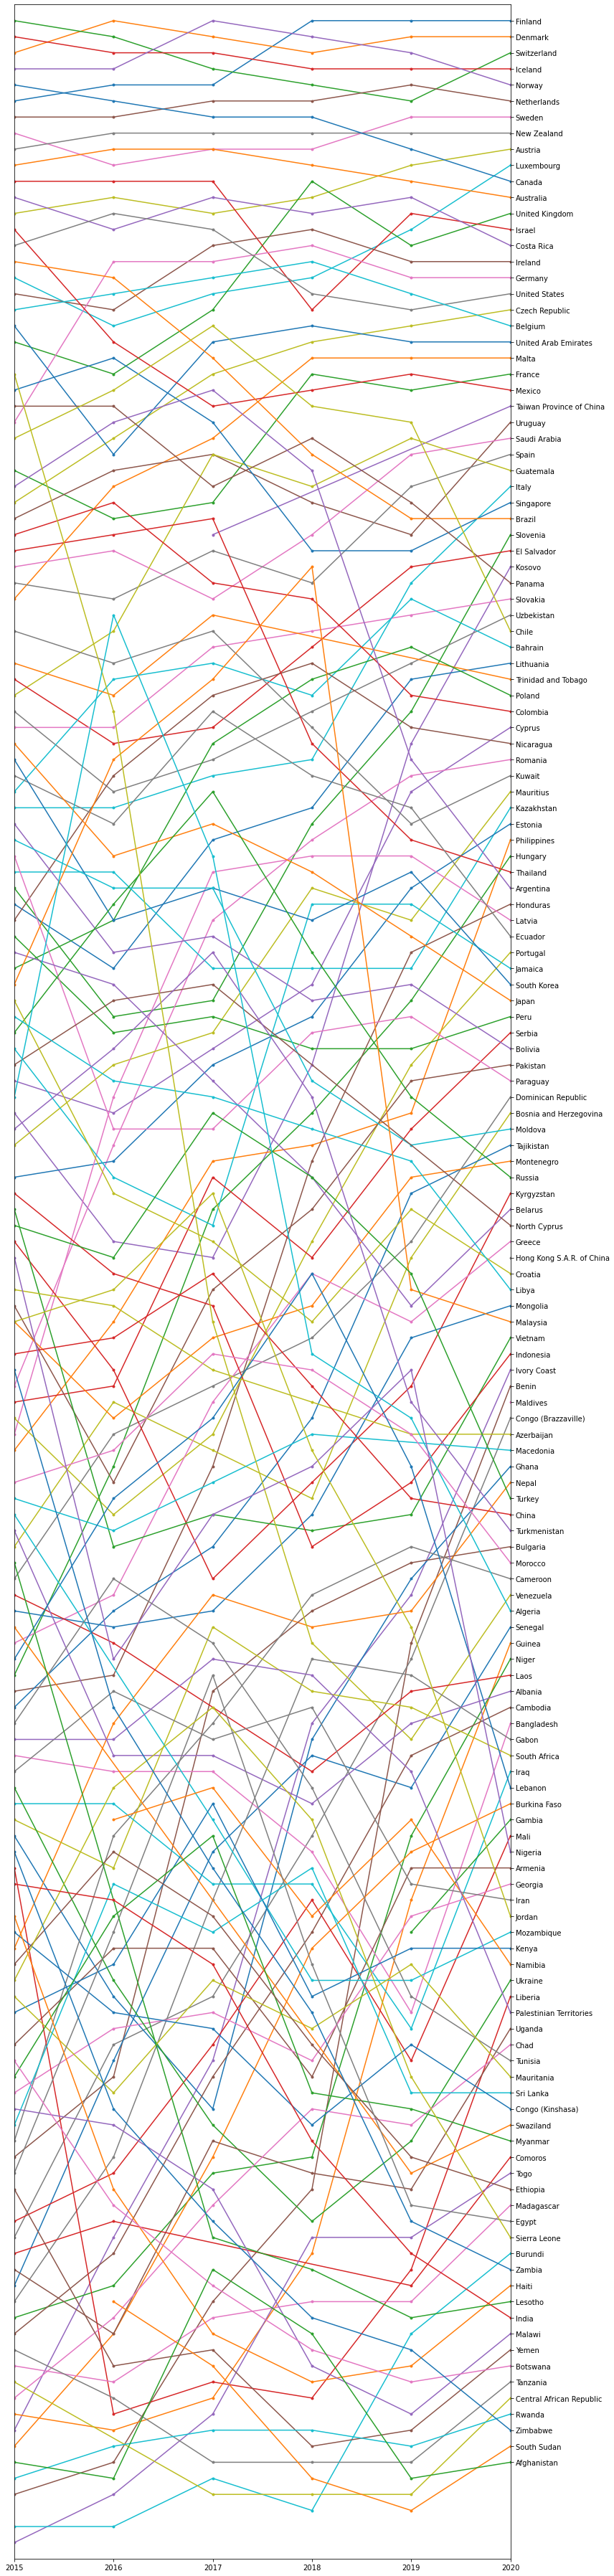

In [201]:
# 아래 셀과 동일하게 년도별 순위 변화를 시각화하기
# Hint) plt.plot을 이용하고, 필요한 경우 데이터프레임을 변형하면서 그리시오.

fig = plt.figure(figsize=(12, 50))
rank2020 = rank_table[rank_table['2020'].notna()]
for c in rank_table[rank_table['2020'].notna()].index:
    t= rank_table.loc[c].dropna()
    plt.plot(t.index, t ,'.-')

plt.xlim(['2015', '2020'])
plt.ylim([0, rank_table.max().max() + 1])
plt.yticks(range(1, rank2020.shape[0] + 1), rank2020.index)
ax = plt.gca() # get current axis
ax.invert_yaxis() # y축 위 아래도 바뀜
ax.yaxis.set_label_position('right') # 포지션 오픈쪽으로!
ax.yaxis.tick_right() # 틱 오른쪽으로 옮겨짐
plt.tight_layout()
plt.show()


### 문제 9. 분야별로 나누어 점수 시각화하기

In [217]:
# sns.barplot()을 이용하여 아래 셀과 동일하게 시각화하기
# Hint) 필요에 따라 데이터프레임을 수정하여 사용하시오. 적절한 수정을 위해 누적합(pd.cumsum())을 활용하시오.

data= df_all[df_all['year'] == '2020']
data= data.loc[data.index[:20]]

d = data[data.columns[4:]].cumsum(axis=1)
d = d[d.columns[::-1]] # 뒤집기
d['country'] = data['country']

d

,residual,trust,generosity,freedom,health,family,economy,country
0,7.808666,5.045831,4.567974,4.408304,3.745987,2.784715,1.285190,Finland
1,7.645565,5.212824,4.717564,4.474770,3.809730,2.830398,1.326949,Denmark
2,7.559934,5.209667,4.801721,4.532665,3.903711,2.863178,1.390774,Switzerland
3,7.504452,5.043764,4.899223,4.536893,3.874913,2.874069,1.326502,Iceland
4,7.488005,5.319738,4.885638,4.597653,3.927452,2.919380,1.424207,Norway
5,7.448898,5.096781,4.728212,4.391894,3.778268,2.802592,1.338946,Netherlands
6,7.353545,5.107245,4.665179,4.392351,3.742053,2.755583,1.322235,Sweden
7,7.299567,5.171459,4.710191,4.384465,3.737675,2.729536,1.242318,New Zealand
8,7.294245,4.895799,4.614543,4.359033,3.755664,2.754730,1.317286,Austria
9,7.237480,5.083780,4.716738,4.520784,3.910647,2.924204,1.536676,Luxembourg


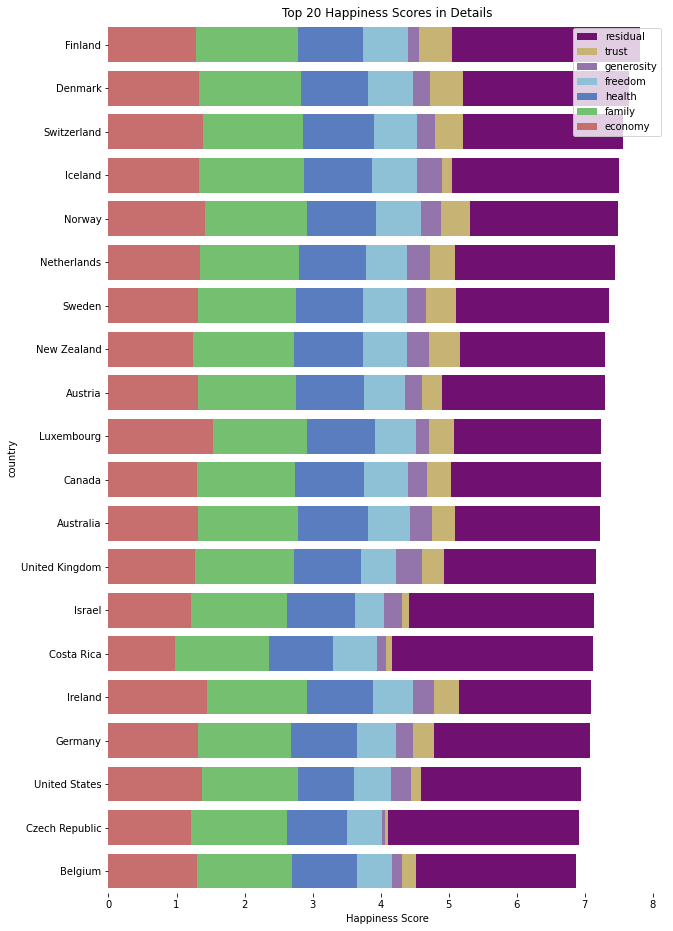

In [230]:
plt.figure(figsize=(10, 16))

colors= ['r', 'g', 'b', 'c','m', 'y', 'purple'][::-1]

sns.set_color_codes('muted')
for idx, c in enumerate(d.columns[:-1]):
    sns.barplot(x=c, y='country', data=d, label=c, color=colors[idx])

    plt.legend()
plt.title('Top 20 Happiness Scores in Details')
plt.xlabel('Happiness Score')
sns.despine(left=True, bottom=True) # 프레임 없애기
plt.show()

### 문제 10. Column간의 상관성 시각화하기

<ipython-input-243-8111fa8df946>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


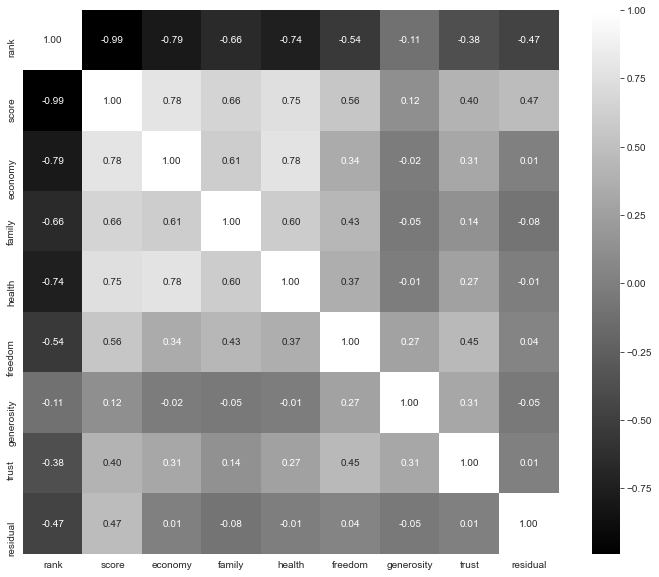

In [243]:
# 상관성 Heatmap, Pairplot 등으로 상관성을 시각화하기

sns.set({'figure.figsize' : (12, 10)} )
sns.heatmap(df_all.corr(), cmap='gray', annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

# residual은 다른 컬럼과 상관성이 없어!
# economy, health, family ... 상관성이 있는편임

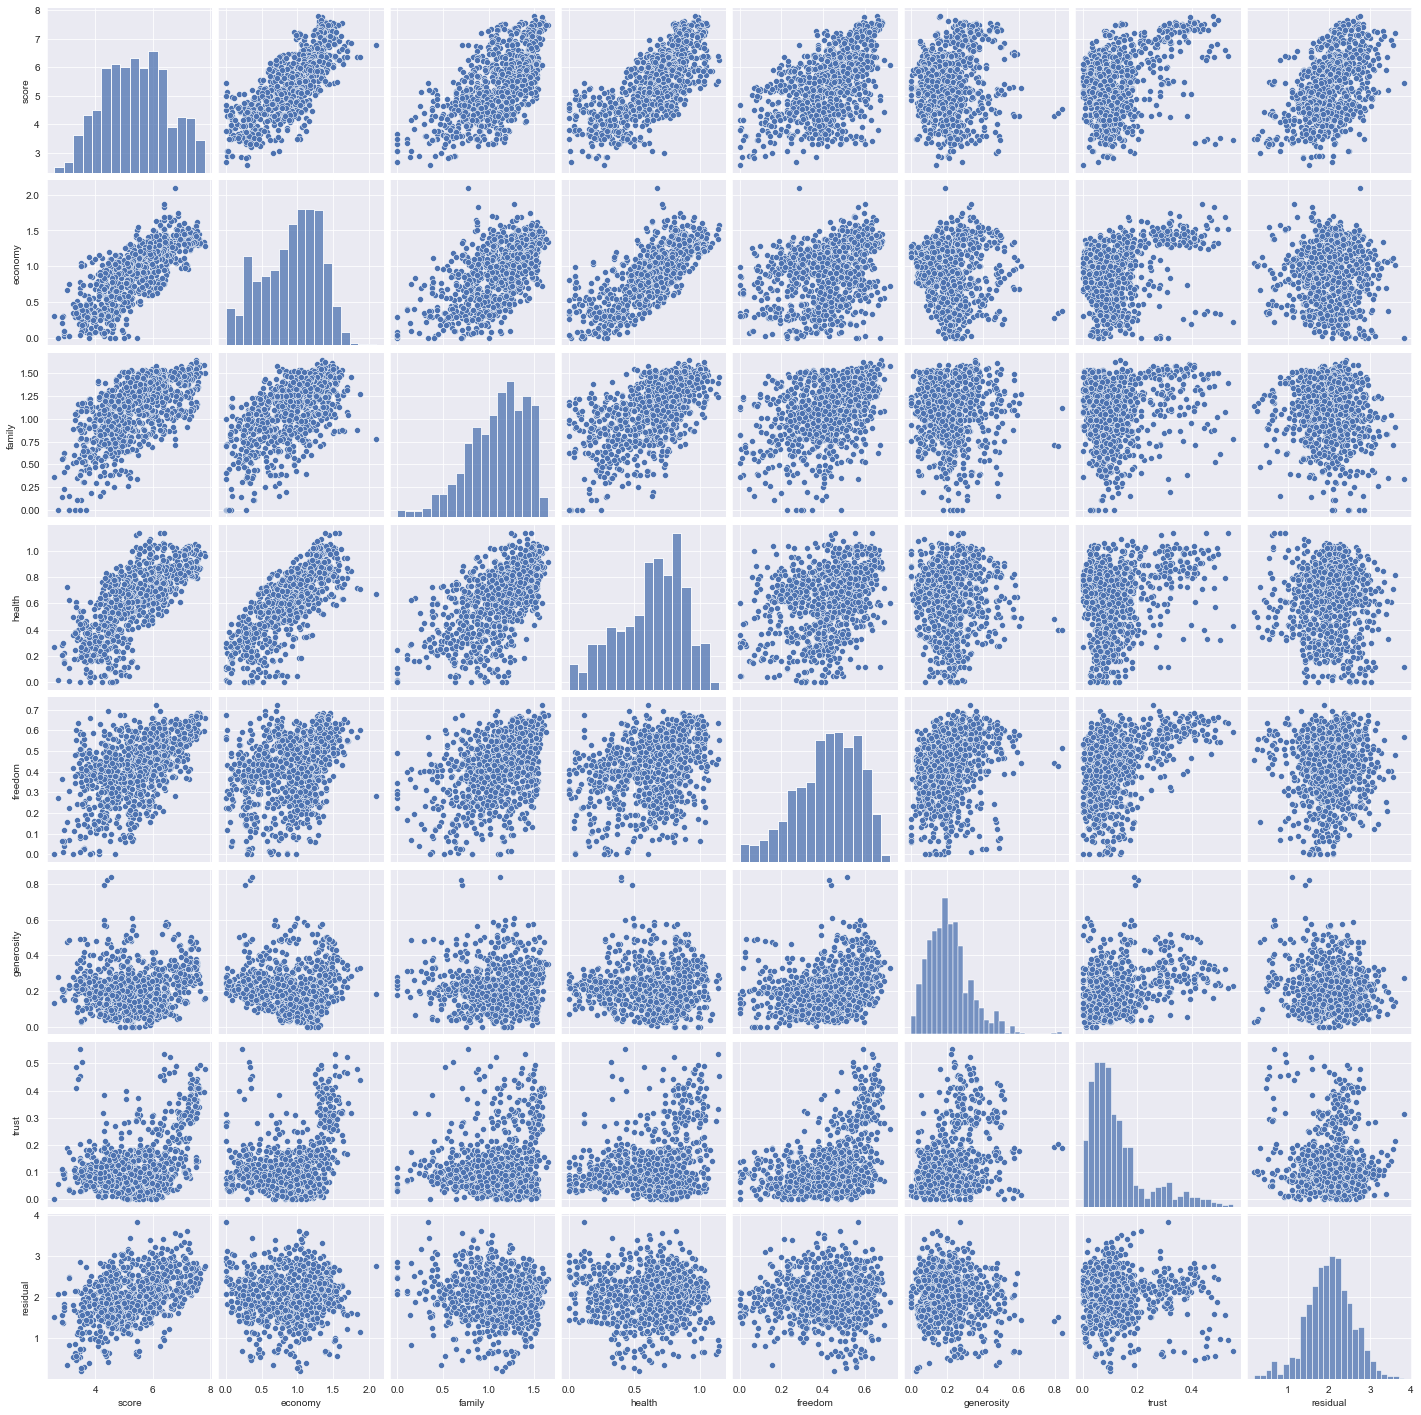

In [244]:
sns.pairplot(df_all.drop('rank', axis=1))

# score : freedom, generosity 상관성 낮아보임


## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 모델의 입력과 출력 정의하기

In [248]:
df_all.columns

Index(['year', 'rank', 'country', 'score', 'economy', 'family', 'health',
       'freedom', 'generosity', 'trust', 'residual'],
      dtype='object')

In [249]:
col_input_list = ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
col_out = 'score'

### 문제 12. 학습데이터와 테스트데이터 분리하기


In [250]:
# 2015년 ~ 2019년도 데이터를 학습 데이터로, 2020년도 데이터를 테스트 데이터로 분리하기
df_train = df_all[df_all['year'] != '2020']
df_test = df_all[df_all['year'] == '2020']

X_train = df_train[col_input_list]
y_train = df_train[col_out]
X_test = df_test[col_input_list]
y_test = df_test[col_out]

### 문제 13. StandardScaler를 이용해 학습 데이터 표준화하기


In [251]:
from sklearn.preprocessing import StandardScaler

In [252]:
# StandardScaler를 이용해 학습 데이터를 표준화하기
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

## Step 5. Regression 모델 학습하기

### 문제 14. Linear Regression 모델 학습하기

In [253]:
from sklearn.linear_model import LinearRegression

In [256]:
print(X_train.isna().sum()) # trust = 0임 다른 걸 더하면 score 나옴
print(X_test.isna().sum())

economy       0
family        0
health        0
freedom       0
generosity    0
trust         1
dtype: int64
economy       0
family        0
health        0
freedom       0
generosity    0
trust         0
dtype: int64


In [260]:
X_train_scaled.fillna(0, inplace=True)

In [261]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

### 문제 15. 모델 학습 결과 평가하기

In [262]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [263]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_lr.predict(X_test_scaled)

print(f'RMSE : {sqrt(mean_squared_error(y_test, pred))}')
print(f'MAE : {mean_absolute_error(y_test, pred)}')

RMSE : 0.566683185584599
MAE : 0.4411766043832983


In [264]:
y_test.describe()

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: score, dtype: float64

### 문제 16. XGBoost Regression 모델 학습하기

In [265]:
from xgboost import XGBRegressor

In [266]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()

model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 문제 17. 모델 학습 결과 평가하기

In [267]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_xgb.predict(X_test_scaled)


print(f'RMSE : {sqrt(mean_squared_error(y_test, pred))}')
print(f'MAE : {mean_absolute_error(y_test, pred)}')

RMSE : 0.521788101095574
MAE : 0.40956910915901373


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 18. 실제 값과 추측 값의 Scatter plot 시각화하기


In [270]:
import matplotlib.pyplot as plt

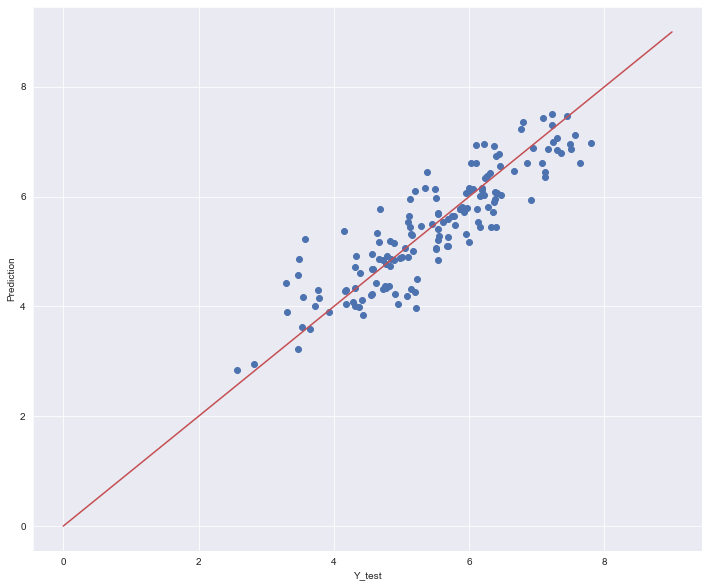

In [274]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기

plt.scatter(y_test, pred)
plt.plot([0, 9], [0, 9], 'r-')
plt.xlabel('Y_test')
plt.ylabel('Prediction')
plt.show()

### 문제 19. LinearRegression 모델의 Coefficient 시각화하기


Index(['economy', 'family', 'health', 'freedom', 'generosity', 'trust'], dtype='object')
[0.4668183  0.21113409 0.24912736 0.22598521 0.07256232 0.09027353]


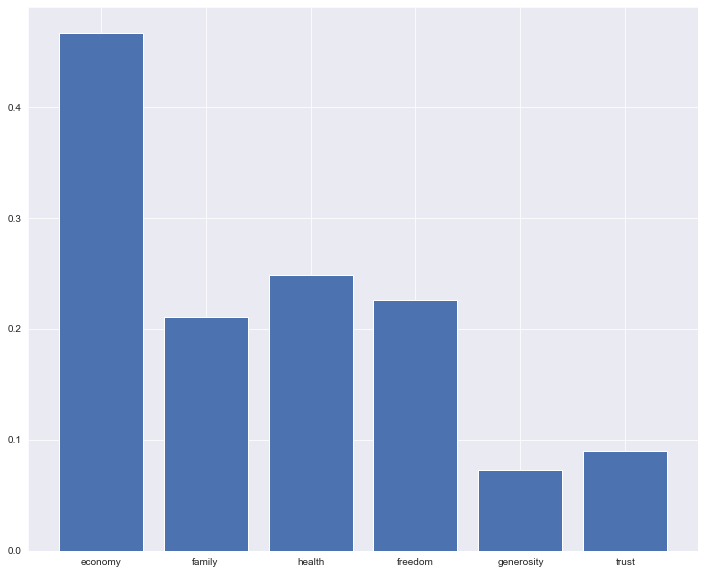

In [281]:
# model_lr.coef_ 시각화하기

print(X_train_scaled.columns)
print(model_lr.coef_)

plt.bar(X_train_scaled.columns, model_lr.coef_ )
plt.show()

### 문제 20. XGBoost 모델의 Feature Importance 시각화하기


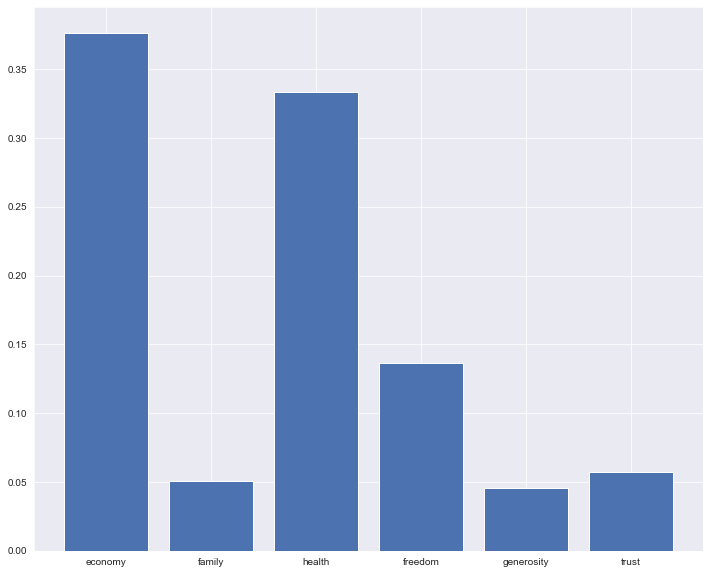

In [283]:
# model_xgb.feature_importance_ 시각화하기

plt.bar(X_train_scaled.columns, model_xgb.feature_importances_)
plt.show()